In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path="C:/Users/Lenovo/OneDrive/Desktop/Datasets/Predict_Data.xlsx"
sheet_name='vw_ChurnData'
df=pd.read_excel(file_path,sheet_name=sheet_name)
print(df.head())

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11098-MAD  Female   30     Yes  Madhya Pradesh                    0   
1   11114-PUN    Male   51      No          Punjab                    5   
2   11167-WES  Female   43     Yes     West Bengal                    3   
3   11179-MAH    Male   35      No     Maharashtra                   10   
4   11180-TAM    Male   75     Yes      Tamil Nadu                   12   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                31     Deal 1           Yes             No  ...   
1                 9     Deal 5           Yes             No  ...   
2                28     Deal 1           Yes            Yes  ...   
3                12        NaN           Yes             No  ...   
4                27     Deal 2           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      95.099998   6683.399902          0.00   
1  Bank Wi

In [3]:
df=df.drop(['Customer_ID','Churn_Category','Churn_Reason'],axis=1)
df.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,Yes,...,Two Year,No,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed
1,Male,51,No,Punjab,5,9,Deal 5,Yes,No,Yes,...,Month-to-Month,Yes,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned
2,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,Yes,...,Two Year,Yes,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910156,Stayed
3,Male,35,No,Maharashtra,10,12,NaN,Yes,No,Yes,...,Two Year,Yes,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed
4,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,Yes,...,Two Year,Yes,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed


In [4]:
colum=['Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method']
label_encoders={}
for cl in colum:
    label_encoders[cl]=LabelEncoder()
    df[cl]=label_encoders[cl].fit_transform(df[cl])
df['Customer_Status']=df['Customer_Status'].map({'Stayed':0,'Churned':1})
X=df.drop('Customer_Status',axis=1)
df['Customer_Status']=df['Customer_Status'].fillna(0)
y=df['Customer_Status']
X_train, X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [5]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [6]:
rf_model.score(X,y)

0.9682037622773431

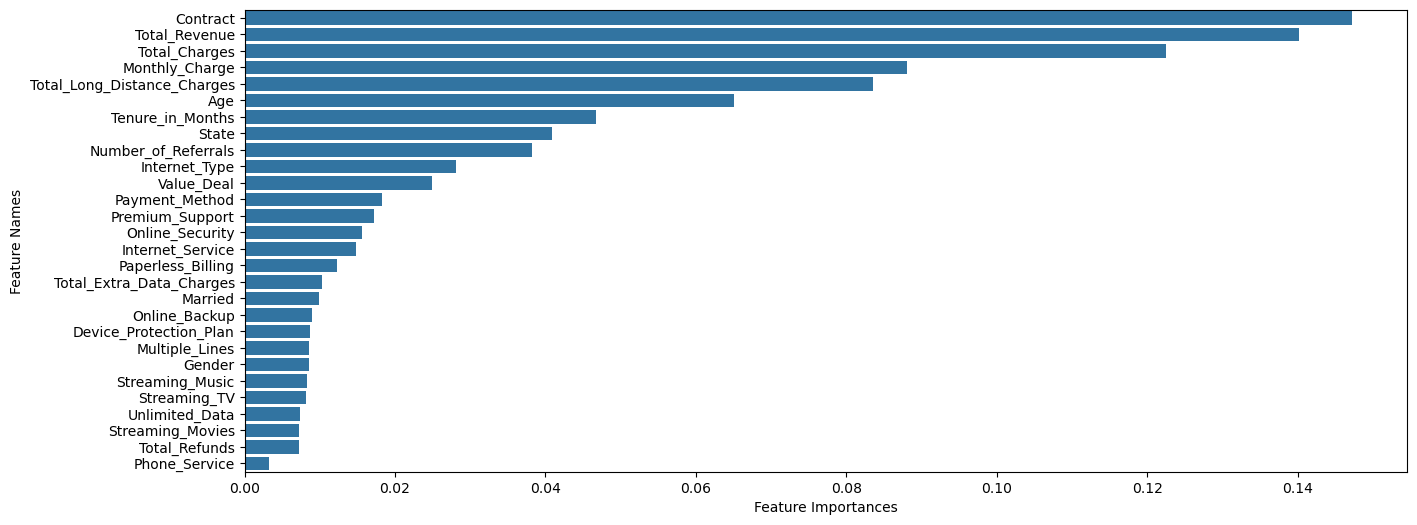

In [7]:
y_pred=rf_model.predict(X_test)
importances=rf_model.feature_importances_
indices=np.argsort(importances)[::-1]
plt.figure(figsize=(15,6))
sns.barplot(x=importances[indices],y=X.columns[indices])
plt.xlabel('Feature Importances')
plt.ylabel('Feature Names')
plt.show()

In [8]:
file_path="C:/Users/Lenovo/OneDrive/Desktop/Datasets/Predict_Data.xlsx"
sheet_name='vw_JoinData'
new_df=pd.read_excel(file_path,sheet_name=sheet_name)
print(new_df.head())

  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   11751-TAM  Female   18      No   Tamil Nadu                    5   
1   12056-WES    Male   27      No  West Bengal                    2   
2   12136-RAJ  Female   25     Yes    Rajasthan                    2   
3   12257-ASS  Female   39      No        Assam                    9   
4   12340-DEL  Female   51     Yes        Delhi                    0   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 7     Deal 5            No             No  ...   
1                20        NaN           Yes             No  ...   
2                35        NaN           Yes             No  ...   
3                 1        NaN           Yes             No  ...   
4                10        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check      24.299999     38.450001           0.0   
1  Bank Withdrawal      90.4

In [9]:
original_data=new_df.copy()
customer_ids=new_df['Customer_ID']
new_df=new_df.drop(['Customer_ID','Customer_Status','Churn_Category','Churn_Reason'],axis=1)
for column in new_df.select_dtypes(include=['object']).columns:
    new_df[column]=label_encoders[column].transform(new_df[column])
new_predictions=rf_model.predict(new_df)
original_data['Customer_Status_Predicted']=new_predictions
original_data=original_data[original_data['Customer_Status_Predicted']==1]
original_data.to_csv("C:/Users/Lenovo/OneDrive/Desktop/Datasets/Predicted_last.csv")